In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## BIRCH - balanced iterative and clustering using hierarchies

#### Cechy BIRCH:
* służy do **wstępnego** pogrupowania danych na dużo małych i bardzo spójnych skupień (następnie bierzemy środki tych klastrów, i używamy innego algorytmu klastrowania na nich)
* algorytm jest bardzo wydajny, przechodzimy przez dane tylko raz
* algorytm może zwrócić różne wyniki w zależności od kolejności danych 

#### Parametry:
* T(treshold), radius upper bound, (radius  = SREDNIA odleglosc punktow od srodka, a nie maksymalna, wiec inny promien niz klasyczny)
* B (branching factor): maksymalna dopuszczalna liczba gałęzi wychodząco z jednego węzła

In [ ]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

# Zad.
Wygenerujmy dane zawierajęce 10 spójnych gróp.

In [ ]:
data, labels =  make_blobs(1000, centers = 10, random_state=0, shuffle=True)
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = labels, cmap = 'viridis')
plt.show()

# Zad.
Wykonaj algorytm  Birch

In [ ]:
b = Birch(threshold = 1, n_clusters= None)
b.fit(data)

In [ ]:
b.subcluster_centers_

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1])
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = b.labels_, cmap = 'viridis')
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

# Zad.
Wykonaj algorytm k-means na wyniku Birch.

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(3)

b = Birch(1, n_clusters = km) # n_clusters = algorithm means algorithm will be used 
                                     # to cluster subclusters obtained from Birch
b.fit(data)

In [ ]:
km.labels_

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', marker = 'x')
plt.show()

In [ ]:
labels_all = km.predict(data)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c=labels_all)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', marker = 'x')
plt.show()

## 10^6 examples

In [ ]:
N_CLUSTERS = 500
data, labels = make_blobs(1000000, centers= N_CLUSTERS, cluster_std = 4, center_box = [0,1000], random_state = 0, shuffle = True)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], s = 1)
plt.show()

In [ ]:
b  = Birch(4, n_clusters = 500, branching_factor = 1000)
b.fit(data)

In [ ]:
len(b.subcluster_centers_)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = b.labels_, cmap = 'Pastel1')
#plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

# MiniBatch Kmeans

   * Algorytm pobiera małe partie zbioru danych (losowo wybrane) dla każdej iteracji.

   * Następnie przypisuje klaster do każdego punktu danych w grupie, w zależności od poprzednich lokalizacji centroidów klastra.

   * Następnie aktualizuje położenie centroidów klastra na podstawie nowych punktów z partii. 

   * Aktualizacja wykonywana jest za pomocą metody gradientowwj, która jest znacznie szybsza niż zwykła aktualizacja Batch K-Means. 
   
   
http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf   

In [15]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [16]:
m_n_k_means = MiniBatchKMeans(n_clusters=500, batch_size= 10000)
m_n_k_means.fit(data)

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=500, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

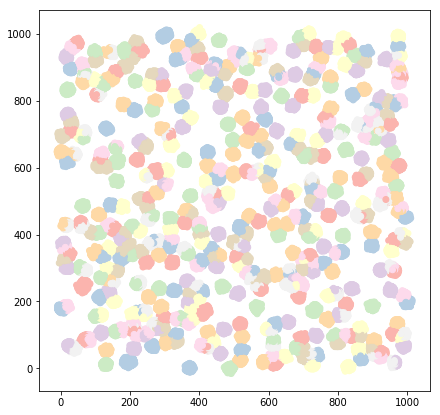

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = m_n_k_means.labels_, cmap = 'Pastel1')
#plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()